In [7]:
import os 
import sys

%matplotlib inline
import matplotlib.pyplot as plt

from desilike.samples import Profiles, Chain, plotting

plt.style.use(os.path.join(os.path.abspath('../bin'), 'plot_style.mplstyle'))
plots_dir = '../../plots/'

In [2]:
tracer = 'ELG_LOP'
region = 'GCcomb'
zrange = (1.1, 1.6)
z = 1.325
ktlim = (0.001, 0.35)
version = 'v4_1'
data_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/{}'.format(version)
covtype = 'ezmocks'
template_name = 'shapefitqisoqap'
thetacut = 0.05

In [3]:
profiles_dir = os.path.join('/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/{}'.format(version), 'profiles', 'profiles_{}_{}_{}_{}_{}_{}'.format(template_name, tracer, zrange[0], zrange[1], 'complete', region))

profile = Profiles.load(os.path.join(profiles_dir, 'physicalpriorbasis/power_velocileptors_{}cov_thetacut0.05.npy'.format(covtype)))
profile_rotated_prior1 = Profiles.load(os.path.join(profiles_dir, 'physicalpriorbasis/power_velocileptors_{}cov_thetacut0.05_sculptwindow_priors1.0.npy'.format(covtype)))
profile_rotated_prior5 = Profiles.load(os.path.join(profiles_dir, 'physicalpriorbasis/power_velocileptors_{}cov_thetacut0.05_sculptwindow_priors5.0.npy'.format(covtype)))
profile_rotated_prior10 = Profiles.load(os.path.join(profiles_dir, 'physicalpriorbasis/power_velocileptors_{}cov_thetacut0.05_sculptwindow_priors10.0.npy'.format(covtype)))
profile_rotated_noprior = Profiles.load(os.path.join(profiles_dir, 'physicalpriorbasis/power_velocileptors_{}cov_thetacut0.05_sculptwindow.npy'.format(covtype)))

In [4]:
sys.path.append('../bin')
from emulator_fit import get_observable_likelihood

output_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/{}/'.format(version)
emulator_dir = os.path.join(output_dir, 'emulators', 'emulators_{}_{}_z{:.3f}'.format(template_name, tracer[:7], z))
emulator_fn=os.path.join(emulator_dir, '{}_{{}}.npy'.format('power'))

likelihood = get_observable_likelihood(catalog='second', version=version, tracer=tracer, region=region, z=z, zrange=zrange, completeness='complete',
                                       xinlim=ktlim, theory_name='velocileptors', template_name=template_name, 
                                       covtype=covtype, emulator_fn=emulator_fn, solve=True, rpcut=0, thetacut=thetacut)

likelihood_rotated_prior1 = get_observable_likelihood(catalog='second', version=version, tracer=tracer, region=region, z=z, zrange=zrange, completeness='complete',
                                       xinlim=ktlim, theory_name='velocileptors', template_name=template_name, 
                                       covtype=covtype, emulator_fn=emulator_fn, solve=True, rpcut=0, thetacut=thetacut, sculpt_window=True, systematic_priors=1)

likelihood_rotated_prior5 = get_observable_likelihood(catalog='second', version=version, tracer=tracer, region=region, z=z, zrange=zrange, completeness='complete',
                                       xinlim=ktlim, theory_name='velocileptors', template_name=template_name, 
                                       covtype=covtype, emulator_fn=emulator_fn, solve=True, rpcut=0, thetacut=thetacut, sculpt_window=True, systematic_priors=5)

likelihood_rotated_prior10 = get_observable_likelihood(catalog='second', version=version, tracer=tracer, region=region, z=z, zrange=zrange, completeness='complete',
                                       xinlim=ktlim, theory_name='velocileptors', template_name=template_name, 
                                       covtype=covtype, emulator_fn=emulator_fn, solve=True, rpcut=0, thetacut=thetacut, sculpt_window=True, systematic_priors=10)

likelihood_rotated_noprior = get_observable_likelihood(catalog='second', version=version, tracer=tracer, region=region, z=z, zrange=zrange, completeness='complete',
                                       xinlim=ktlim, theory_name='velocileptors', template_name=template_name, 
                                       covtype=covtype, emulator_fn=emulator_fn, solve=True, rpcut=0, thetacut=thetacut, sculpt_window=True)

EZmocks covariance.
Loading EZmocks covariance: /global/cfs/cdirs/desi/users/mpinon/Y1/cov/pk/cov_EZmocks_ELG_LOP_ffa_GCcomb_z1.100-1.600_k0.02-0.20_thetacut0.05.npy
Covariance matrix with 108 points built from 1000 observations, resulting in a Hartlap 2007 factor of 0.8909.
Template shapefitqisoqap at redshift z = 1.325.
Emulator path: /global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/v4_1/emulators/emulators_shapefitqisoqap_ELG_LOP_z1.325/power_velocileptors.npy
rotated window path: /global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/v4_1/rotated_window/rotated_all_ELG_LOP_complete_GCcomb_z1.1-1.6_thetacut0.05_ells024_kobsmax0.4_ktmax0.5_maxsigW5_maxsigR5_factordiffell10_analyticcov.npy
Covariance matrix with 108 points built from 1000 observations, resulting in a Hartlap 2007 factor of 0.8909.
Template shapefitqisoqap at redshift z = 1.325.
Emulator path: /global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/v4_1/emulators/emulators_shapefitqisoqap_ELG_LOP_z1.325/power_velocilept

In [5]:
from desilike import Fisher

fisher = Fisher(likelihood, method='auto')
fisher = fisher(**profile.bestfit.choice(input=True))

fisher_rotated_prior1 = Fisher(likelihood_rotated_prior1, method='auto')
fisher_rotated_prior1 = fisher_rotated_prior1(**profile_rotated_prior1.bestfit.choice(input=True))

fisher_rotated_prior5 = Fisher(likelihood_rotated_prior5, method='auto')
fisher_rotated_prior5 = fisher_rotated_prior5(**profile_rotated_prior5.bestfit.choice(input=True))

fisher_rotated_prior10 = Fisher(likelihood_rotated_prior10, method='auto')
fisher_rotated_prior10 = fisher_rotated_prior10(**profile_rotated_prior10.bestfit.choice(input=True))

fisher_rotated_noprior = Fisher(likelihood_rotated_noprior, method='auto')
fisher_rotated_noprior = fisher_rotated_noprior(**profile_rotated_noprior.bestfit.choice(input=True))

/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/code/desilike/hmc/lib/python3.10/site-packages/desilike/fisher.py:690: UserWarning: solved parameters: ParameterCollection(['alpha0p', 'alpha2p', 'alpha4p', 'sn0p', 'sn2p', 'sn4p']); cannot proceed with solved parameters, so we will work with likelihood.deepcopy(), varying solved parameters
  warnings.warn('solved parameters: {}; cannot proceed with solved parameters, so we will work with likelihood.deepcopy(), varying solved parameters'.format(solved_params))
/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/code/desilike/hmc/lib/python3.10/site-packages/desilike/fisher.py:690: UserWarning: solved parameters: ParameterCollection(['syst_0', 'syst_1', 'syst_2', 'alpha0p', 'alpha2p', 'alpha4p', 'sn0p', 'sn2p', 'sn4p']); cannot proceed with solved parameters, so we will work with likelihood.deepcopy(), varying solved parameters
  warnings.warn('solved parameters: {}; can

<Figure size 600x600 with 0 Axes>

/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


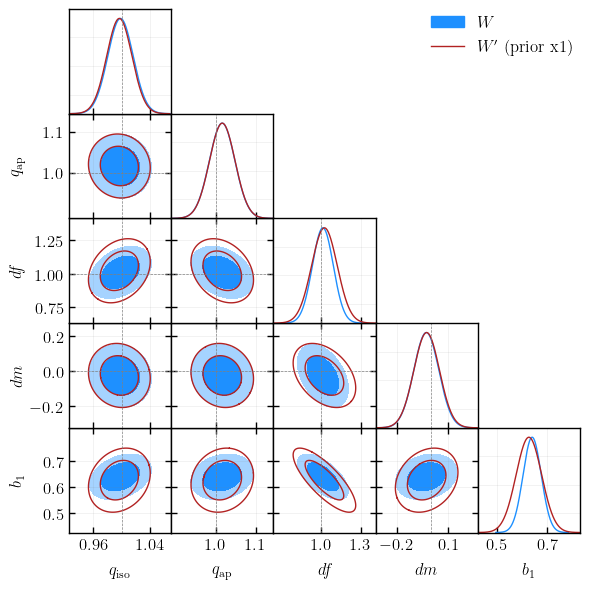

In [14]:
from getdist import plots
g = plots.get_single_plotter(width_inch=6, scaling=False, ratio=1)
g.settings.axes_fontsize = 12
g.settings.axes_labelsize = 12
g.settings.alpha_factor_contour_lines = 0

markers = {'qiso': 1., 'qap': 1., 'df': 1., 'dm': 0.}
params = ['qiso', 'qap', 'df', 'dm', 'b1p']
colors = ['dodgerblue', 'firebrick', 'red', 'orange', 'yellow']
plotting.plot_triangle([fisher, fisher_rotated_prior1], labels=[r'$W$', r'$W^{\prime}$ (prior x1)', r'$W^{\prime}$ (no prior)', r'$W^{\prime}$ (prior x10)', r'$W^{\prime}$ (prior x5)', ],
                       markers=markers, params=params,
                       g=g, lws=1., contour_lws=1., filled=[True, False, False, False], colors=colors, contour_colors=colors,
                       legend_loc='upper right', 
                       show=False)
fig = plt.gcf()
fig.align_ylabels()
plt.show()

<Figure size 1200x1200 with 0 Axes>

/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


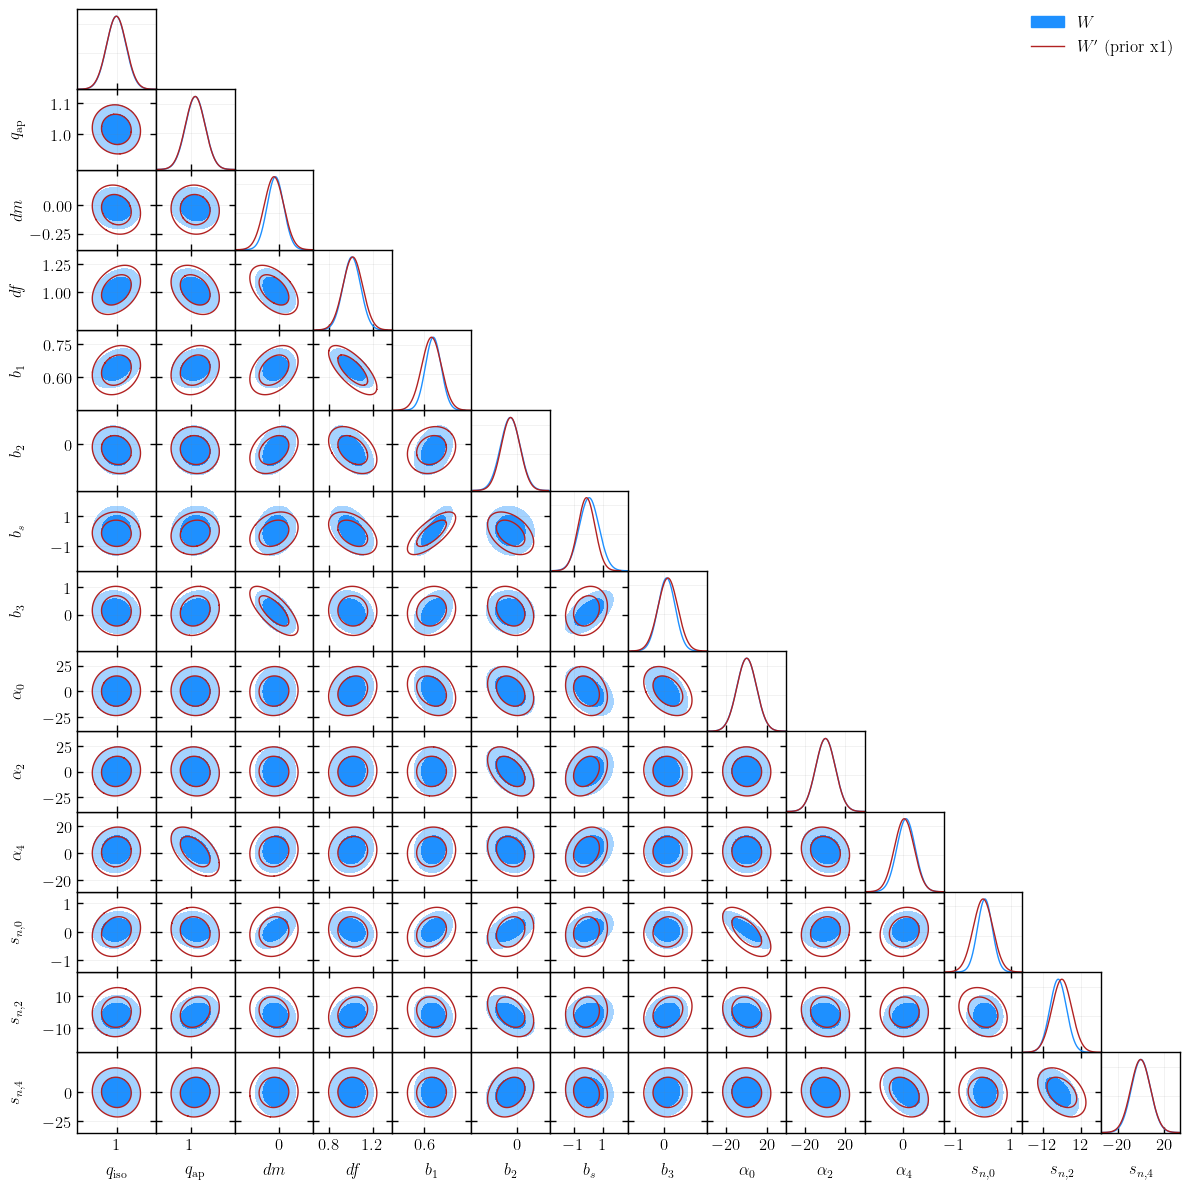

In [12]:
from getdist import plots
g = plots.get_single_plotter(width_inch=12, scaling=False, ratio=1)
g.settings.axes_fontsize = 12
g.settings.axes_labelsize = 12
g.settings.alpha_factor_contour_lines = 0

markers = {'qiso': 1., 'qap': 1., 'df': 1., 'dm': 0.}
params = ['qiso', 'qap', 'df', 'dm', 'b1p']
colors = ['dodgerblue', 'firebrick', 'red', 'orange']
plotting.plot_triangle([fisher, fisher_rotated_prior5], labels=[r'$W$', r'$W^{\prime}$ (prior x1)'],
                       g=g, lws=1., contour_lws=1., filled=[True, False, False, False], colors=colors, contour_colors=colors,
                       legend_loc='upper right', 
                       show=False)
fig = plt.gcf()
fig.align_ylabels()
plt.show()